# Bisecting K-means

## Reference

In [449]:
# https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv

## Library

In [450]:
import pandas as pd
import numpy as np
import re
from  sklearn.cluster import BisectingKMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score


## Import Dataset

In [451]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/country_data.csv'
country = pd.read_csv(path)
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Clean Data

In [452]:
# delete the country columns in country
country1 = country.copy()
country1 = country1.drop(columns = 'country')
# organize the columns name
columns_name = ['X' + str(i) for i in range(0,9)]
country1.columns = columns_name

## Visualize the data

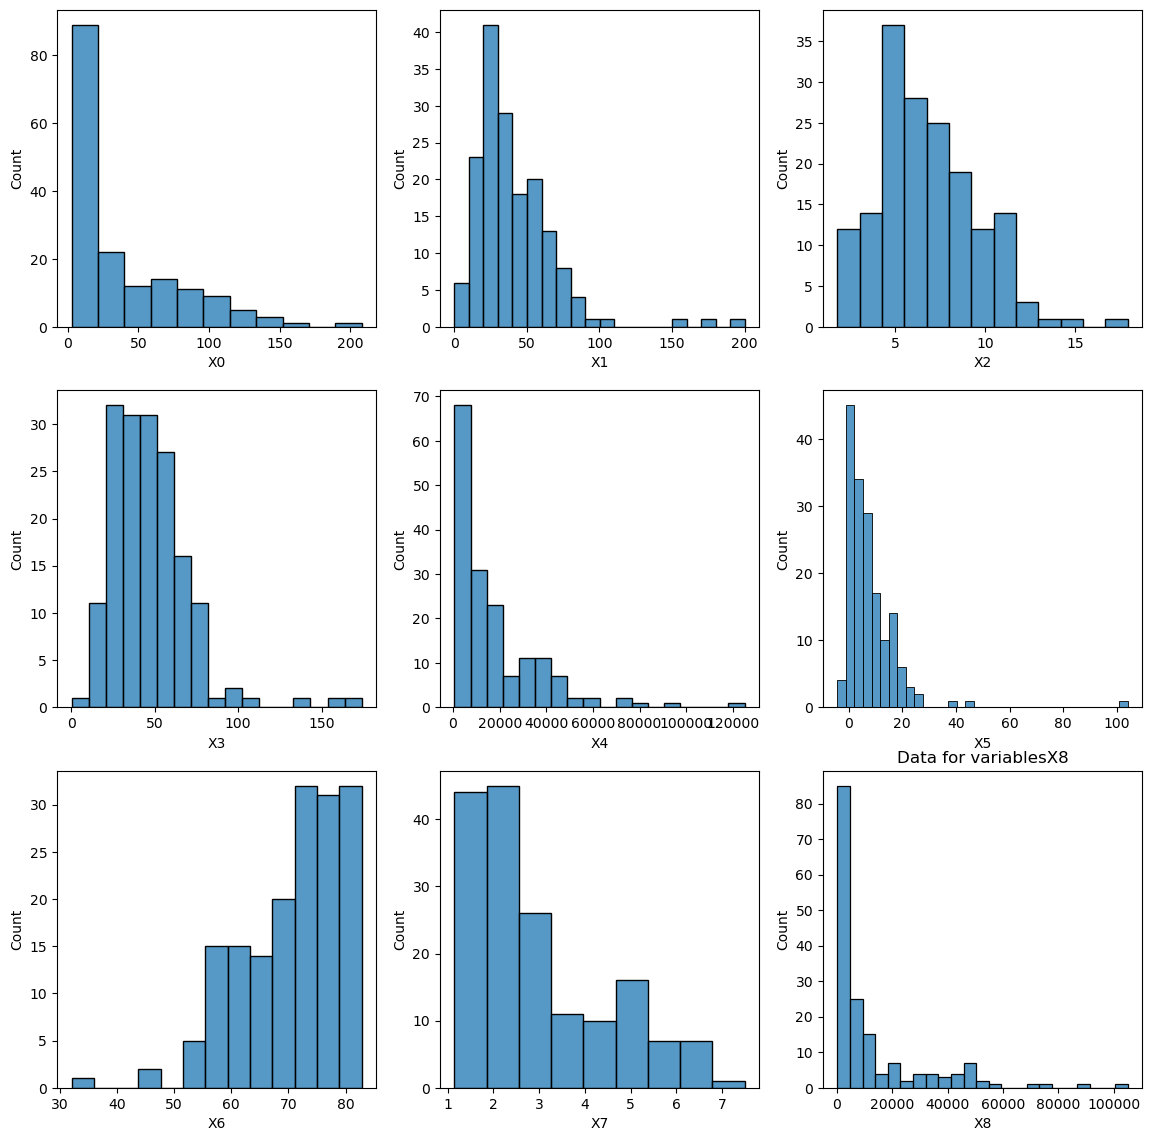

In [453]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14,14))
axes = np.ravel(axes)
title_list = ['Data for variables' + i for i in country1.columns]
for c, i in enumerate(country1.columns):
  sns.histplot(data = country1, x = i, ax = axes[c])
  plt.title(title_list[c])
plt.show()

## Normalize the data

In [454]:
std = StandardScaler()
country1.iloc[:,:]= std.fit_transform(country1.iloc[:,:])

## PCA

In [455]:
pca = PCA(n_components= 2)
country1_reduced = pca.fit_transform(country1)
pca.explained_variance_ratio_.sum()

0.6313336543771413

## Self definition function

In [456]:
# self definition silihouette coffection function
def silhouette_plot(n_cluster, data):
  # apply bisecting kmeans to cluster the data
  bk = BisectingKMeans(n_clusters = n_cluster, init = 'k-means++', n_init = 5, tol = 0.0001)
  bk.fit_transform(data)
  # get the labels for different clusters 
  labels = bk.labels_
  k = len(np.unique(labels))
  silhouette_cofficient = silhouette_samples(X= data, labels= labels)
  score = silhouette_score(X = data, labels = labels)
  c_clusters = np.unique(labels)
  c = 3
  y_ax_lower , y_ax_upper = 0, -c
  fig, axes = plt.subplots(figsize = (7,7))
  yticks = []
  yticks_list = ['Cluster' + str(i) for i in c_clusters]
  for i in c_clusters:
    cond = labels == i
    silhouette_cofficient_c = np.sort(silhouette_cofficient[cond])
    y_ax_upper += len(silhouette_cofficient_c) + c
    yticks.append((y_ax_lower + y_ax_upper) /2 )
    plt.barh(y = range(y_ax_lower, y_ax_upper), width = silhouette_cofficient_c, height = 1)
    y_ax_lower += len(silhouette_cofficient_c) + c
  plt.axvline(x= score, color = 'red', linestyle = '--')
  plt.tight_layout()
  plt.xlabel('silhouette_cofficient')
  plt.yticks(yticks, yticks_list)
  plt.show()
  return score

## Apply silhouette plot to decide the cluster number

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


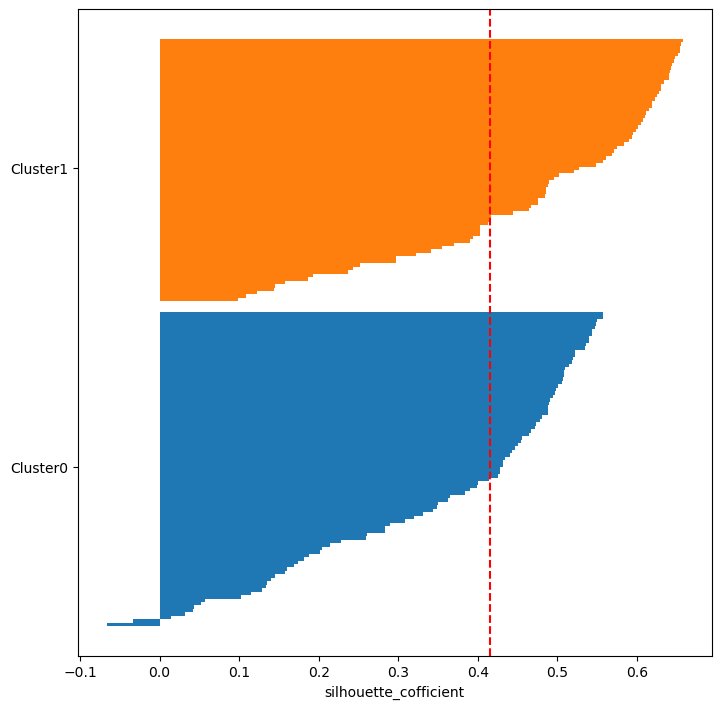

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


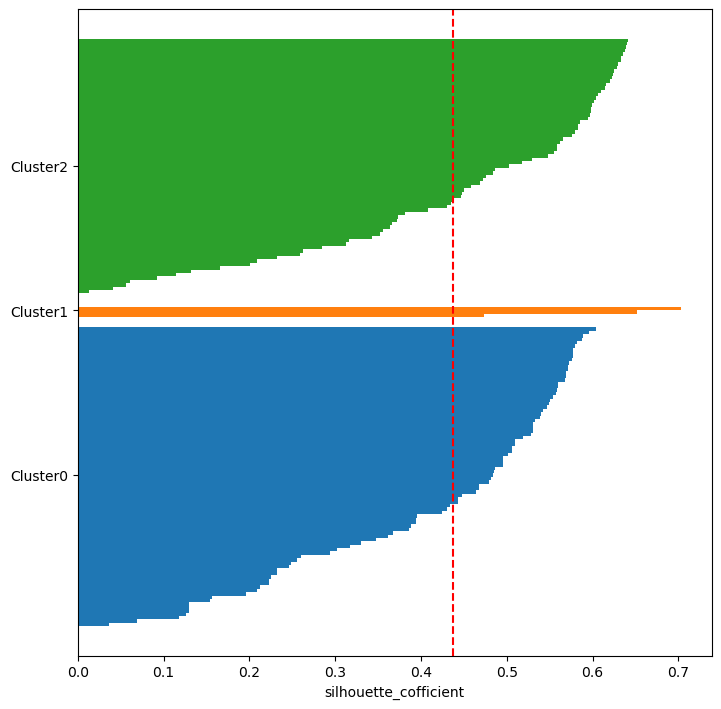

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


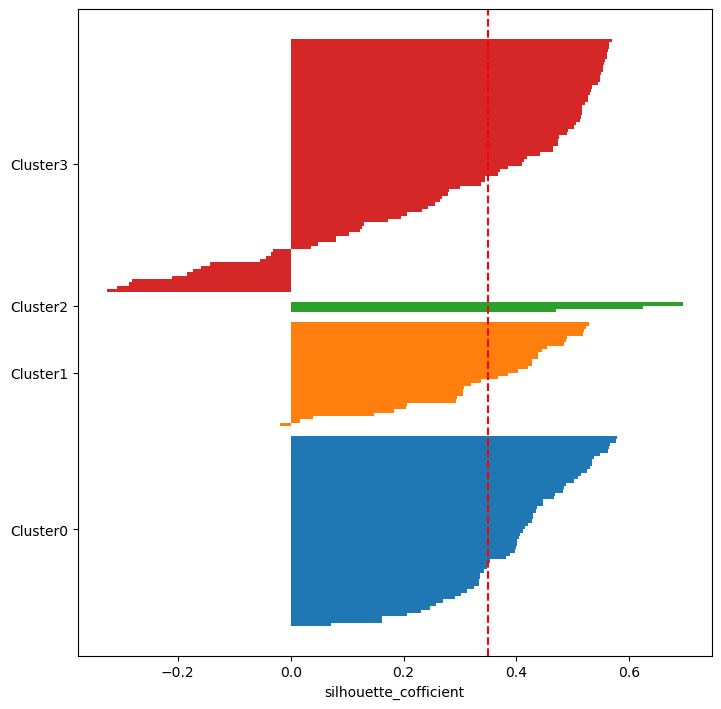

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


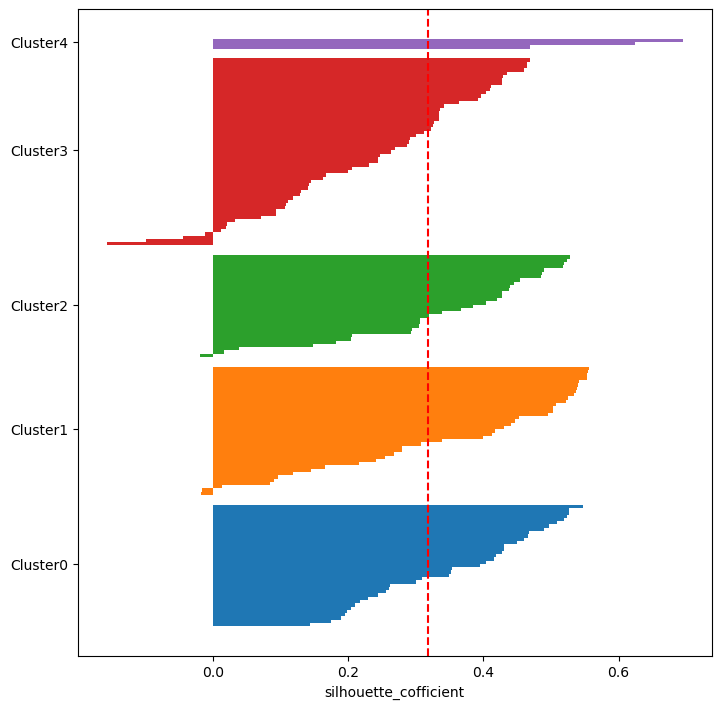

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


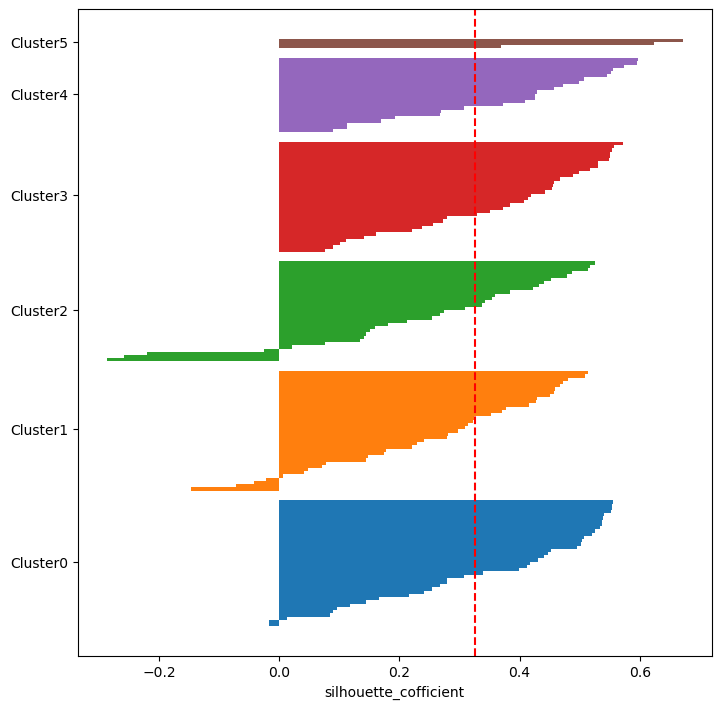

In [467]:
scorelist = []
for i in range(2,7):
  scorelist.append(silhouette_plot(i, country1_reduced))
scorelist
# find the largest scorelist argument
i = np.argmax(scorelist)
i = i + 2


## Bisecting K-means

In [468]:
# apply bisecting kmeans to cluster the data
bk = BisectingKMeans(n_clusters = i, init = 'k-means++', n_init = 5, tol = 0.0001)
bk.fit_transform(country1_reduced)
# get the labels for different clusters 
labels = bk.labels_
k = len(np.unique(labels))


c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Plot cluster

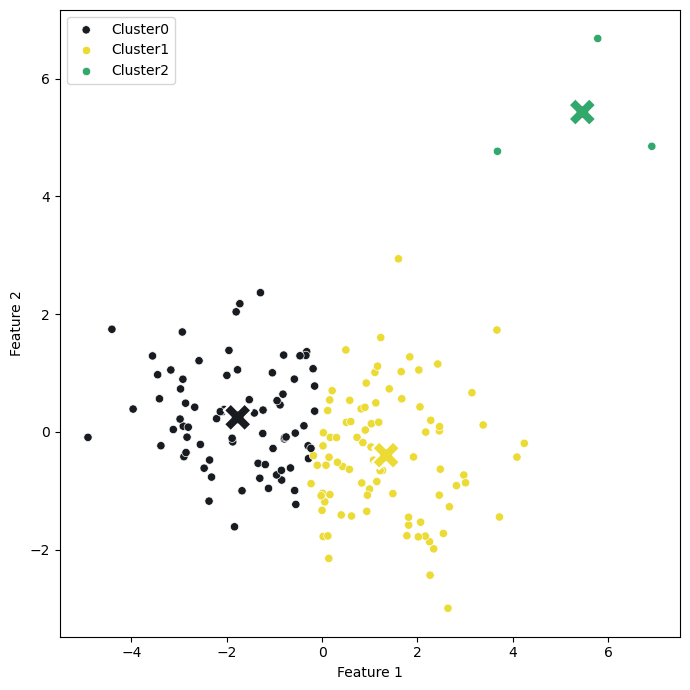

In [469]:
palette_list = ['#ebdb34', '#32a86d', '#181c21','#ad31a3','#c90e37']
legend_list = ['Cluster' + str(i) for i in range(k)]
fig, axes = plt.subplots(figsize = (7,7))
sns.scatterplot(x = country1_reduced[:, 0], y = country1_reduced[:, 1], hue = labels, palette = palette_list[0:i])
sns.scatterplot(x = bk.cluster_centers_[:, 0], y = bk.cluster_centers_[:, 1], hue = np.unique(labels), palette= palette_list[0:i], marker = 'X', s = 400) 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(legend_list)
plt.tight_layout()
plt.show()

## Silhouette Plot

In [470]:
silhouette_cofficient = silhouette_samples(X= country1_reduced, labels= labels)
score = silhouette_score(X = country1_reduced, labels = labels)
c_clusters = np.unique(labels)

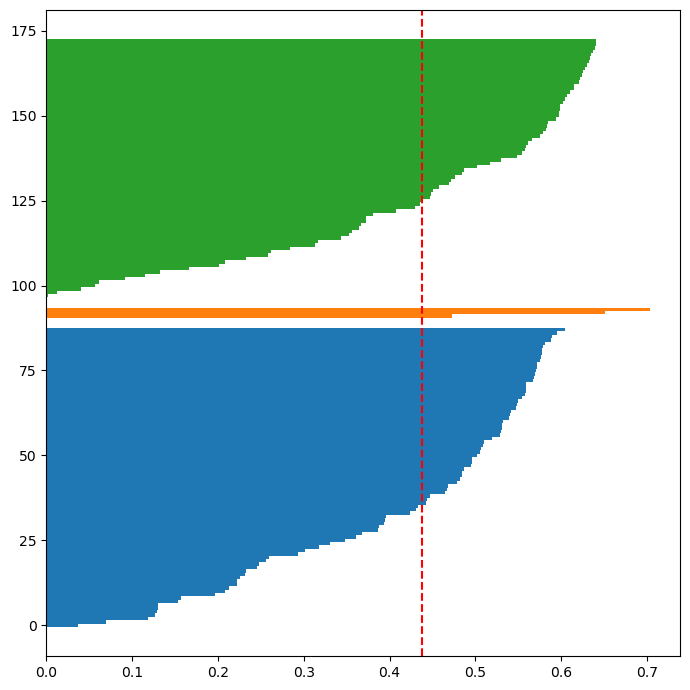

In [471]:
c = 3
y_ax_lower , y_ax_upper = 0, -c
fig, axes = plt.subplots(figsize = (7,7))
for i in c_clusters:
  cond = labels == i
  silhouette_cofficient_c = np.sort(silhouette_cofficient[cond])
  y_ax_upper += len(silhouette_cofficient_c) + c
  plt.barh(y = range(y_ax_lower, y_ax_upper), width = silhouette_cofficient_c, height = 1)
  y_ax_lower += len(silhouette_cofficient_c) + c
plt.axvline(x= score, color = 'red', linestyle = '--')
plt.tight_layout()
plt.show()